In [1]:
# 1. Imports & Paths
import importlib.util
import os, sys, re, pandas as pd
sys.path.append(os.path.join(os.pardir, "utils"))

SAVE_DIR = os.path.join(os.pardir, "data/embeddings")
DATA_DIR = os.path.join(os.pardir, "data")
resume_path = os.path.join(DATA_DIR, "resumes_cleaned.csv")
jobs_path   = os.path.join(DATA_DIR, "jobs_cleaned.csv")

In [2]:
%load_ext autoreload
%autoreload 2
from utils import *


c:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 2. Load Data
resume_df = pd.read_csv(resume_path)
job_posts_df = pd.read_csv(jobs_path)

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [12]:
resume_embeddings = model.encode(resume_df["Resume_clean"].tolist(), convert_to_numpy=True, show_progress_bar=True)
job_embeddings = model.encode(job_posts_df["job_text_clean"].tolist(), convert_to_numpy=True, show_progress_bar=True)

Batches: 100%|██████████| 171/171 [03:38<00:00,  1.28s/it]


In [15]:
resume_embeddings = resume_embeddings / np.clip(np.linalg.norm(resume_embeddings, axis=1, keepdims=True), 1e-12, None)
job_embeddings    = job_embeddings / np.clip(np.linalg.norm(job_embeddings, axis=1, keepdims=True), 1e-12, None)

In [8]:
from sentence_transformers import SentenceTransformer, util


In [16]:
# --- Save embeddings ---
np.save(os.path.join(SAVE_DIR, "resume_embeddings.npy"), resume_embeddings)
np.save(os.path.join(SAVE_DIR, "job_embeddings.npy"), job_embeddings)


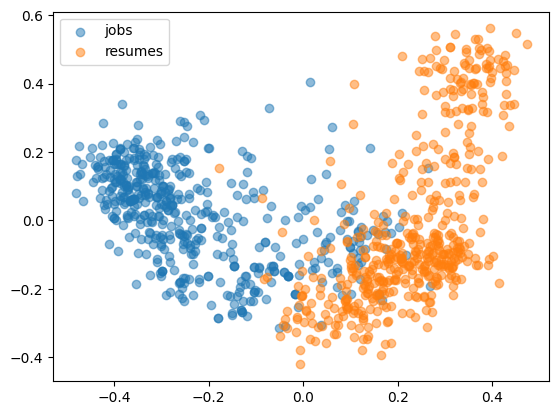

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
combined = np.vstack([job_embeddings[:500], resume_embeddings[:500]])
proj = pca.fit_transform(combined)

plt.scatter(proj[:500,0], proj[:500,1], alpha=0.5, label="jobs")
plt.scatter(proj[500:,0], proj[500:,1], alpha=0.5, label="resumes")
plt.legend()
plt.show()